<a href="https://colab.research.google.com/github/MariamAbdelmoneim02/DEPI-Tasks/blob/master/04_Regression_Task_(Mariam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Learned Coefficient (slope m): 3.9197294629921102
Learned Intercept (c): 6.429133194585674

Training Results:
MAE: 7.347297926919519
MSE: 84.76788564209706
R2 Score: 0.9746404976582503
----------------------------------------

Testing Results:
MAE: 5.913425779189773
MSE: 65.36995137170015
R2 Score: 0.9825431689004598
----------------------------------------


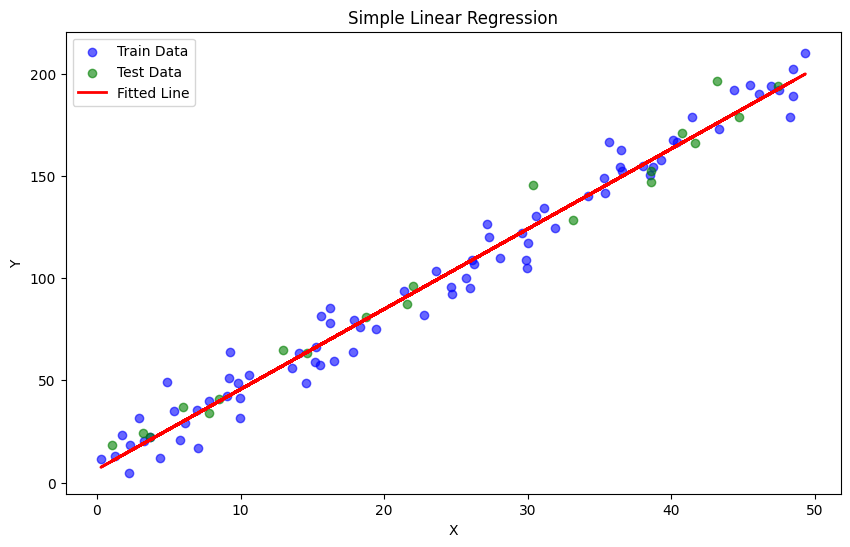

In [5]:
m = 4
c = 5

np.random.seed(42)
X = np.random.uniform(0, 50, 100)
noise = np.random.normal(0, 10, X.shape)
Y = m * X + c + noise

X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, Y_train)

print("Learned Coefficient (slope m):", model.coef_[0])
print("Learned Intercept (c):", model.intercept_)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("\nTraining Results:")
print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("MSE:", mean_squared_error(Y_train, Y_train_pred))
print("R2 Score:", r2_score(Y_train, Y_train_pred))
print("--"*20)
print("\nTesting Results:")
print("MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", mean_squared_error(Y_test, Y_test_pred))
print("R2 Score:", r2_score(Y_test, Y_test_pred))
print("--"*20)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(X_test, Y_test, color='green', label='Test Data', alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Fitted Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Notes:
The model generalizes well, as train and test R2 scores are both high and similar, also the errors are low.

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [12]:
np.random.seed(42)
X1 = np.random.uniform(0, 50, 100)
X2 = np.random.uniform(0, 50, 100)
noise = np.random.normal(0, 10, X1.shape)
Y = 2 * X1 + 3 * X2 + 5 + noise

X1 = X1.reshape(-1, 1)
X2 = X2.reshape(-1, 1)
X = np.hstack((X1, X2))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Learned Coefficients (a1, a2):", model.coef_)
print("Learned Intercept (c):", model.intercept_)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("\nTraining Results:")
print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("MSE:", mean_squared_error(Y_train, Y_train_pred))
print("R2 Score:", r2_score(Y_train, Y_train_pred))
print("--"*20)
print("\nTesting Results:")
print("MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", mean_squared_error(Y_test, Y_test_pred))
print("R2 Score:", r2_score(Y_test, Y_test_pred))
print("--"*20)

Learned Coefficients (a1, a2): [1.95000442 3.15743475]
Learned Intercept (c): 2.9325748897352213

Training Results:
MAE: 7.860361190219924
MSE: 101.88908218390625
R2 Score: 0.9638376280391601
----------------------------------------

Testing Results:
MAE: 7.333148245900253
MSE: 66.64320988651875
R2 Score: 0.9800916811564406
----------------------------------------


### Notes
1- The learned coefficients and bias are close to the original values. So, the model accurately recovered the equation <br>
2- The r2 scores are both high and similar, and errors are somewhat low, so the model generalizes well

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [13]:
from sklearn.preprocessing import PolynomialFeatures


X = np.random.uniform(0, 70, 100)
noise = np.random.normal(0, 10, X.shape)
Y = 2 * X**2 + 3 * X + 5 + noise

X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

preprocessor = PolynomialFeatures(degree=2)
X_train_poly = preprocessor.fit_transform(X_train)
X_test_poly = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

Y_train_pred = model.predict(X_train_poly)
Y_test_pred = model.predict(X_test_poly)

print("Learned Coefficients:", model.coef_)
print("Learned Intercept (c):", model.intercept_)
print("--"*20)
print("\nTraining Results:")
print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("MSE:", mean_squared_error(Y_train, Y_train_pred))
print("R2 Score:", r2_score(Y_train, Y_train_pred))
print("--"*20)
print("\nTesting Results:")
print("MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", mean_squared_error(Y_test, Y_test_pred))
print("R2 Score:", r2_score(Y_test, Y_test_pred))
print("--"*20)

Learned Coefficients: [0.         3.01758384 2.00033414]
Learned Intercept (c): 4.383918812695811
----------------------------------------

Training Results:
MAE: 8.77146879423792
MSE: 109.73581310238055
R2 Score: 0.9999876212500285
----------------------------------------

Testing Results:
MAE: 4.321893534466699
MSE: 31.03709682661895
R2 Score: 0.9999960808581024
----------------------------------------


### Notes:
- The errors are low in both training and testing, and r2 scores are high, thus the model can generalize well

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [23]:
import seaborn as sns

In [14]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [15]:
os.listdir(path)

['airlines_flights_data.csv']

In [16]:
full_path = os.path.join(path,os.listdir(path)[0])

In [17]:
import pandas as pd
df = pd.read_csv(full_path)

In [18]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [19]:
df.drop(columns=['index'], inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [21]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [22]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [31]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [42]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [43]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

<Axes: ylabel='price'>

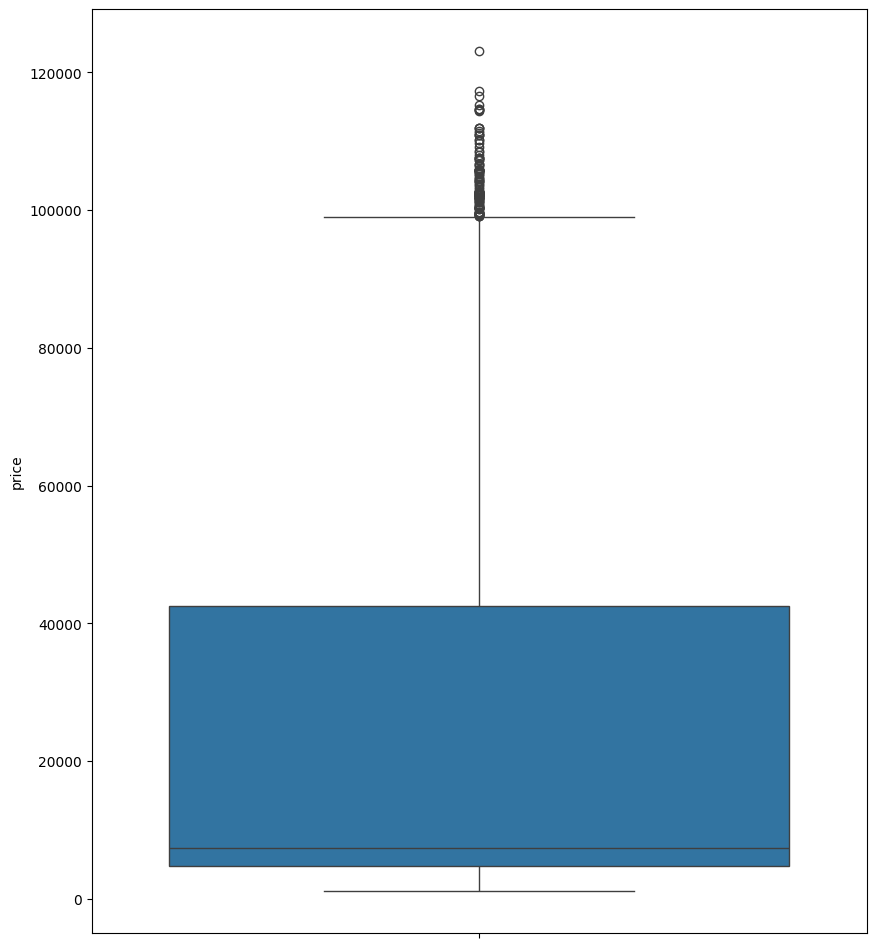

In [26]:
plt.figure(figsize=(10, 12))
sns.boxplot(df['price'])

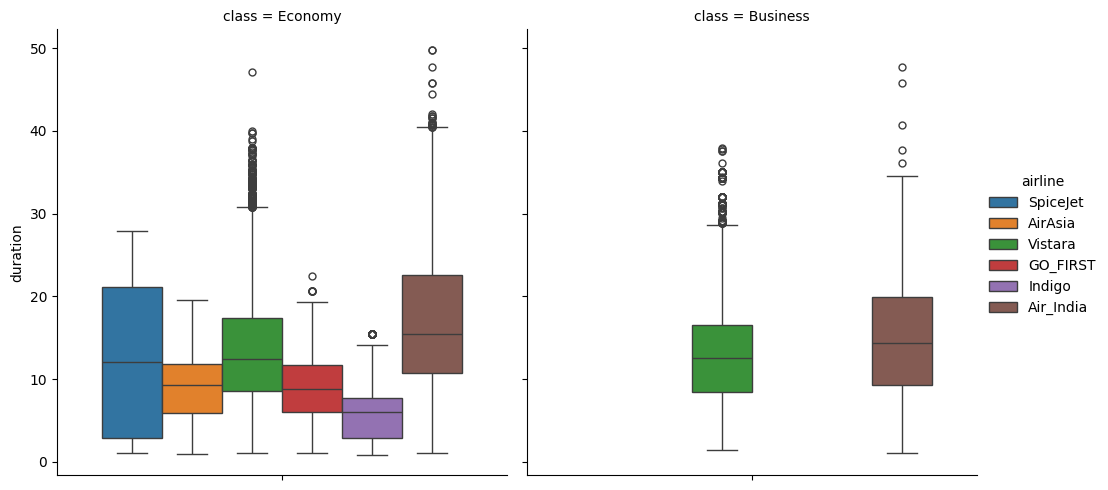

In [30]:
sns.catplot(data=df, y='duration',kind='box', col='class', hue='airline')

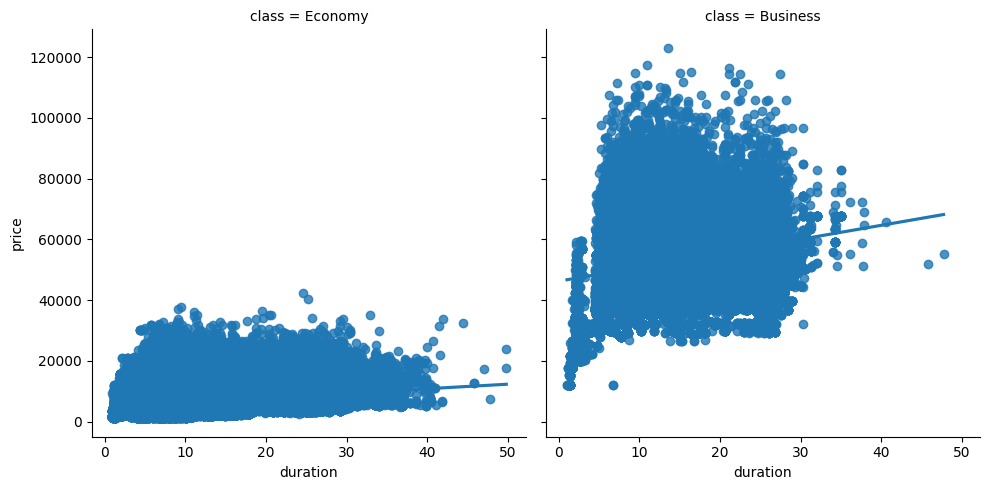

In [40]:
sns.lmplot(data=df, y='price', x='duration',col='class')

<Axes: xlabel='class', ylabel='airline'>

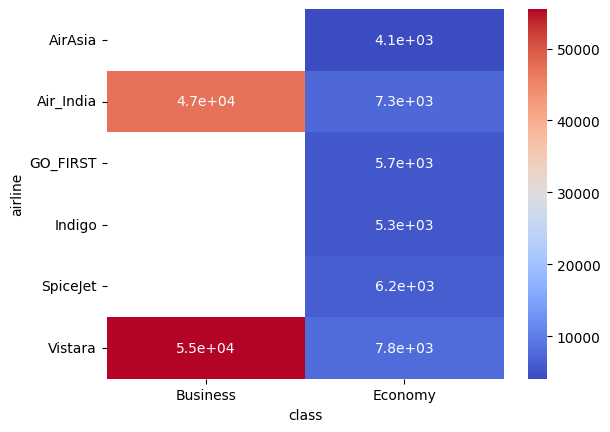

In [35]:
sns.heatmap(pd.crosstab(df['airline'], df['class'], values=df['price'], aggfunc='mean'), annot=True, cmap='coolwarm')

<Axes: xlabel='destination_city', ylabel='source_city'>

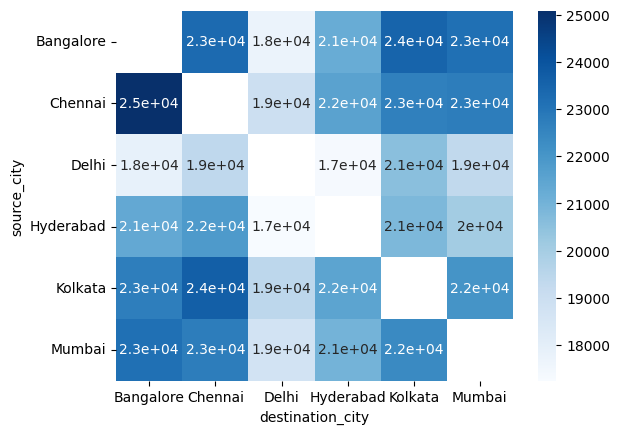

In [39]:
sns.heatmap(pd.crosstab(df['source_city'], df['destination_city'], values=df['price'], aggfunc='mean'), annot=True, cmap='Blues')

In [38]:
df.drop_duplicates(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [63]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(handle_unknown='ignore')
label_encoder = OrdinalEncoder()
scaler = StandardScaler()

labels = ['stops', 'class']
cats = ['airline', 'flight', 'source_city', 'destination_city', 'arrival_time', 'departure_time']

cat_pipeline = Pipeline(
    [
        ('one_hot', one_hot),
    ])


label_pipeline = Pipeline(
    [
        ('label_encoder', label_encoder),
    ])

num_pipeline = Pipeline(
    [
        ('scaler', scaler),
    ])

preprocessor = ColumnTransformer(
    [
        ('cat', cat_pipeline, cats),
        ('label', label_pipeline, labels),
        ('num', num_pipeline, ['duration', 'days_left'])
    ])



In [64]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', linear_model)
    ])
pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("--"*20)
print("\nTesting Results:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))
print("--"*20)

Training Results:
MAE: 4294.940479177821
MSE: 39641462.36577624
R2 Score: 0.9230431848613108
----------------------------------------

Testing Results:
MAE: 4293.3451575898935
MSE: 39889208.38486829
R2 Score: 0.9226176913733606
----------------------------------------


The error in MSE is higher than normal, the model underfits the data

In [65]:
# save the model
import joblib
joblib.dump(pipeline, 'flight_price_model.pkl')

['flight_price_model.pkl']

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
